<h1>Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points</h1>


In [91]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dateutil.parser as parser

tesla = yf.Ticker("TSLA")
tesla_price_data = tesla.history(period="max")
tesla_price_data.reset_index(inplace=True)

tesla_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h1>Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points</h1>

In [123]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).content
soup = BeautifulSoup(data, 'html.parser')

tsla_df = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tsla_df = pd.concat([tsla_df, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True) 

tsla_df["Revenue"] = tsla_df['Revenue'].str.replace('$',"")
tsla_df["Revenue"] = tsla_df['Revenue'].str.replace(',',"")

tsla_df.dropna(inplace=True)

tsla_df = tsla_df[tsla_df['Revenue'] != ""]
tsla_df.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


<h1>Question 3: Use yfinance to Extract Stock Data</h1>

In [126]:
gme_stop = yf.Ticker("GME")
gme_stop_data = tesla.history(period="max")
gme_stop_data.reset_index(inplace=True)

gme_stop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h1>Question 4: Use Webscraping to Extract GME Revenue Data</h1>

In [127]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data_gme = requests.get(url_gme).content
soup_gme = BeautifulSoup(data_gme, 'html.parser')

gme_df = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_df = pd.concat([tsla_df, pd.DataFrame({"Date":[date], "Revenue": [revenue]})], ignore_index=True) 

gme_df["Revenue"] = tsla_df['Revenue'].str.replace('$',"")
gme_df["Revenue"] = tsla_df['Revenue'].str.replace(',',"")

gme_df.dropna(inplace=True)

gme_df = gme_df[gme_df['Revenue'] != ""]
gme_df.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


<h1>Question 5: Plot Tesla Stock Graph</h1>

In [87]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

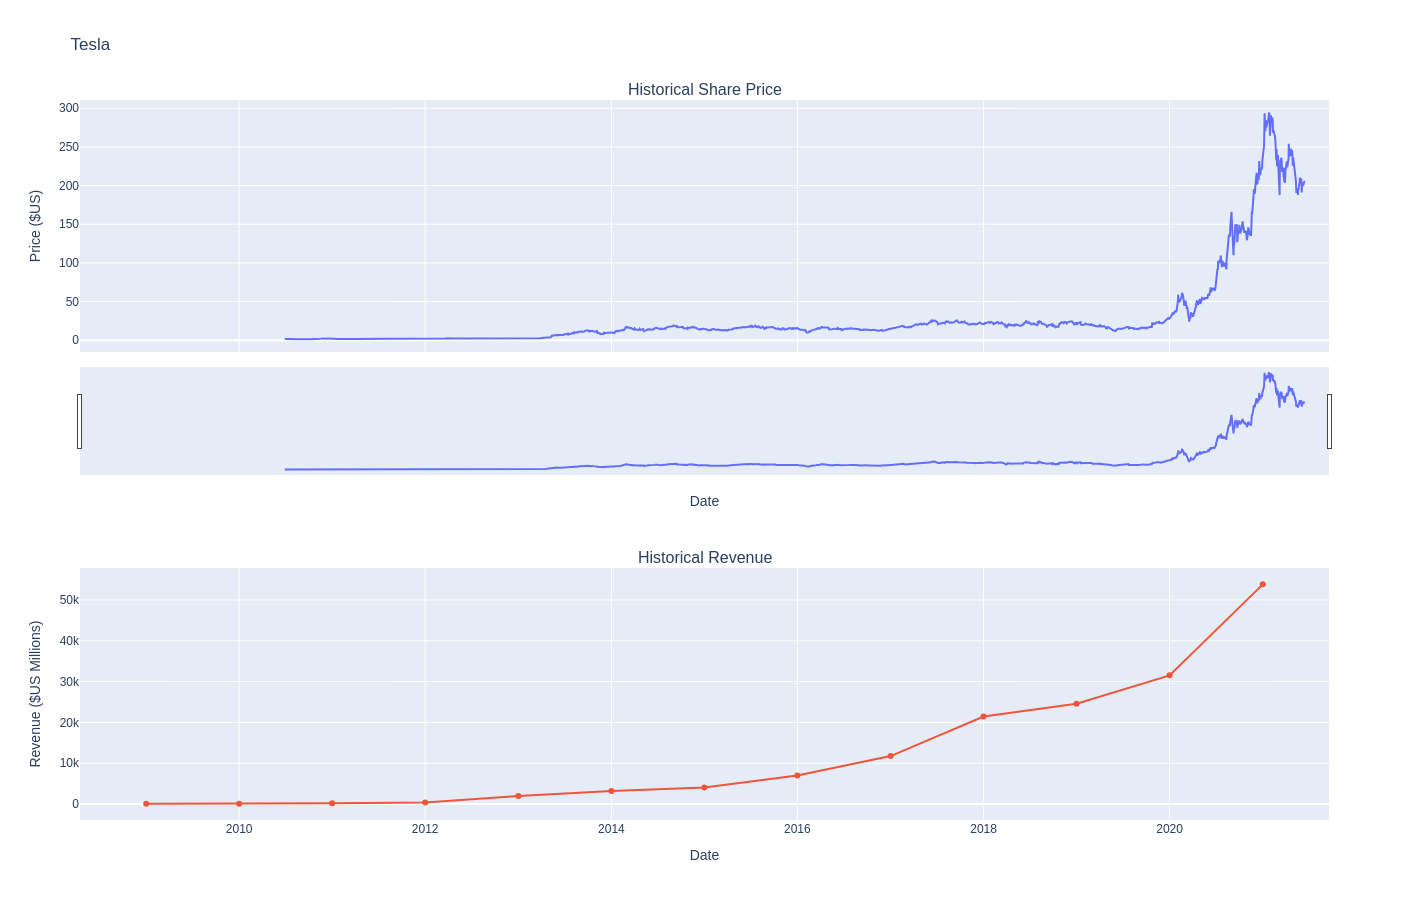

In [124]:
make_graph(tesla_price_data, tsla_df, 'Tesla')

<h1>Question 6: Plot GameStop Stock Graph</h1>

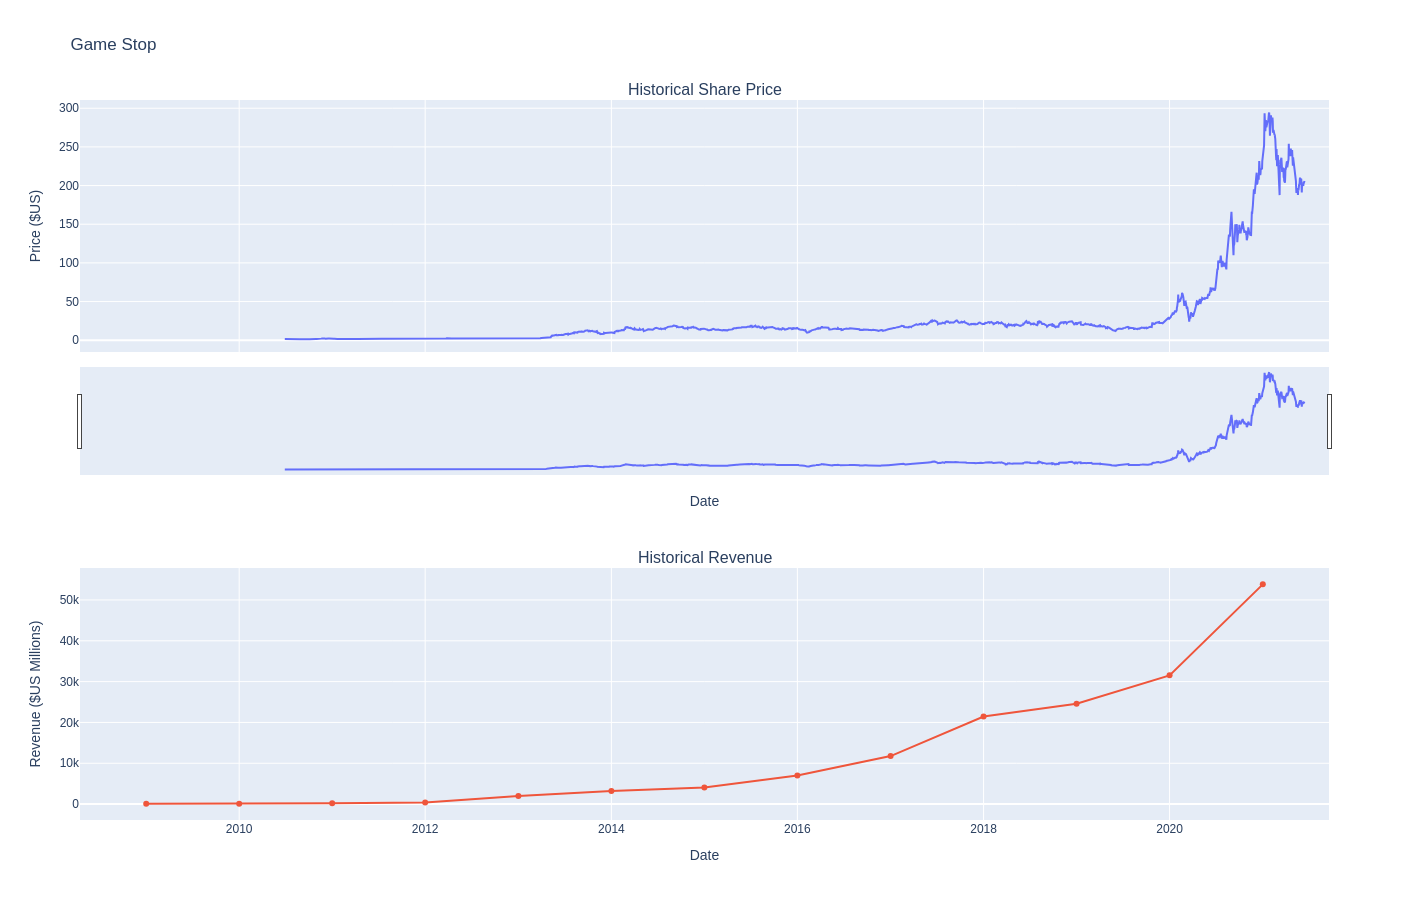

In [128]:
make_graph(gme_stop_data, gme_df, 'Game Stop')